In [42]:
import numpy as np
import cmath
import plotly.graph_objects as go

a = np.array([[0.96, 1.72],
              [2.28, 0.96]])

eig_vals, eig_vecs = np.linalg.eig(a)
eig_vals


array([ 2.94030301, -1.02030301])

In [3]:
eig_vecs


array([[ 0.65574385, -0.65574385],
       [ 0.75498344,  0.75498344]])

In [4]:
# singular values:

sing_vals = np.array([np.sqrt(eig_val) for eig_val in np.linalg.eig(a@a.T)[0]])


In [5]:
sing_vals


array([1., 3.])

In [6]:
def get_eig(x):
    """ In descending order of eigenvalues"""
    eigenValues, eigenVectors = np.linalg.eig(x)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    return eigenValues, eigenVectors


def get_svd(x):  # с точностью до знака воспроизводит матрицу х
    sing_vals = np.array([np.sqrt(eig_val)
                         for eig_val in get_eig(x@x.T)[0]])
    left_sing_vecs = get_eig(x@x.T)[1]  # u
    right_sing_vecs = get_eig(x.T@x)[1]  # v
    return left_sing_vecs, sing_vals, right_sing_vecs.T


U, S, Vh = get_svd(a)
# U@np.diag(S)@Vh
U, S, Vh
U@np.diag(S)@Vh


array([[-0.96, -1.72],
       [-2.28, -0.96]])

In [7]:
a


array([[0.96, 1.72],
       [2.28, 0.96]])

In [8]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(a)
px.scatter(x=df[0], y=df[1])


In [9]:
df


,0,1
0,0.96,1.72
1,2.28,0.96


In [10]:
b = np.array([[1, 2],
              [3, 4],
              [5, 6]])
a = b
centered = a - a.mean(axis=0)
n, m = centered.shape
covmat = np.cov(centered.T)  # unbiased
covmat, centered.T@centered


(array([[4., 4.],
        [4., 4.]]),
 array([[8., 8.],
        [8., 8.]]))

In [33]:
def get_pca(x):
    centered = x - x.mean(axis=0)
    n, m = centered.shape
    y = centered/np.sqrt(n-1)
    _, sigma, vh = get_svd(y)
    # print(f'sigma: {sigma}')
    # c = y.T@y
    pr_components = vh.T
    return pr_components


t = b[0]  # projectable vector

for pc in get_pca(b).T:
    projection = pc@t
    print(projection)


2.1213203435596424
0.7071067811865475


In [34]:
df = pd.read_excel('data_for_lab1.xlsx', index_col=0)
df


/home/serhio/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,e_wbgi_pve,e_wbgi_vae,e_wbgi_cce,e_wbgi_gee,e_wbgi_rle,e_wbgi_rqe
1,-1.178,-0.220,-1.053,-0.452,-0.430,-0.794
2,-1.090,-0.406,-0.954,-0.663,-0.508,-0.856
3,-1.399,-0.346,-0.943,-0.673,-0.523,-1.084
4,-0.725,-0.444,-0.955,-0.376,-0.238,-0.875
5,-1.193,-0.536,-0.783,-0.495,-0.149,-0.958
...,...,...,...,...,...,...
272,0.776,0.987,0.549,0.961,1.154,0.988
273,0.741,0.892,0.494,1.066,1.101,0.950
274,0.780,0.996,0.694,1.037,1.156,1.017
275,0.928,1.008,0.805,1.051,1.091,0.985


In [35]:
X = df.values


In [36]:
pcs = get_pca(X)
pcs.shape


(6, 6)

In [21]:
t.shape


(276,)

In [27]:
from collections import defaultdict

t = X[0]  # first object
sum_distances_by_pc = defaultdict(int)
for pc_num, pc in enumerate(pcs.T):
    for obj in X:
        projection = pc@obj
        sum_distances_by_pc[pc_num] += projection**2

vars = pd.Series(sum_distances_by_pc, index=sorted(list(sum_distances_by_pc.keys())))
vars /= sum(vars)
vars


0    0.816026
1    0.078887
2    0.039055
3    0.049066
4    0.009593
5    0.007373
dtype: float64

In [28]:
# Разложим по двум компонентам

(6, 6)

In [39]:
selected_pcs = pcs[:, :2]
selected_pcs

array([[ 0.27773555,  0.88741452],
       [ 0.46704115, -0.38962632],
       [ 0.40791352,  0.12456082],
       [ 0.37923265, -0.076316  ],
       [ 0.44401036, -0.19832478],
       [ 0.44427412,  0.00381454]])

In [43]:
transformed = X@selected_pcs
transformed.shape

(276, 2)

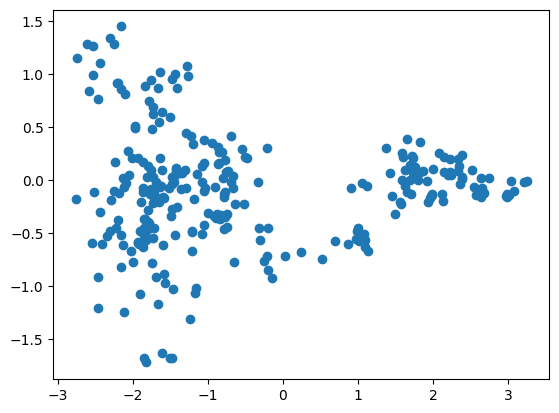

In [47]:
import matplotlib.pyplot as plt

plt.scatter(x=transformed[:, 0], y=transformed[:, 1])